# Sentiment Analysis and Zero-Shot Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving EarthJuice.csv to EarthJuice.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['EarthJuice.csv']))

In [4]:
df

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
0,163,Garden,1634,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-06-30T00:00:00,2021,6,26,Good product,"Good product, plants loved it",organic reviews,21.10,4,0,0,0,No,"good product, plants loved it",2021-06-30,5
1,164,Garden,1635,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-07-27T00:00:00,2021,7,30,Works great!,Plants love this!,organic reviews,21.10,5,0,0,0,No,plants love this!,2021-07-27,3
2,165,Garden,1639,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,2021,8,32,Very Green Grass,This Molasses like ingredient is like super ju...,organic reviews,21.10,5,0,0,0,No,this molasses like ingredient is like super ju...,2021-08-12,61
3,166,Garden,1642,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,2021,8,32,Good stuff,Plants like it,organic reviews,21.10,5,0,0,0,No,plants like it,2021-08-12,3
4,167,Garden,1655,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-09-08T00:00:00,2021,9,36,very good product,very good,organic reviews,21.10,5,0,0,0,No,very good,2021-09-08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,15389,Garden,90673,Earth Juice Elements Cal-N-Mag,https://www.walmart.com//ip/Earth-Juice-Elemen...,Walmart,EarthJuice,103635752,103635752,No,2022-04-16T00:00:00,2022,4,15,Made my roses bloom like crazy!,[This review was collected as part of a promot...,syndicated reviews,10.78,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-04-16,150
73,16462,Garden,110036,Earth Juice Grow Original Formula 1 Gallon,https://www.amazon.com/dp/B000E242UI,Amazon,EarthJuice,B000E242UI,B000E242UI,No,2022-05-01T00:00:00,2022,5,17,"Been using Earth Juice since 1998, still love it",Ive been using Earth Juice as a regular fertil...,organic reviews,32.85,5,0,0,0,No,ive been using earth juice as a regular fertil...,2022-05-01,26
74,24130,Garden,140060,Earth Juice Hi- Brix,https://www.amazon.com.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2022-06-07T00:00:00,2022,6,23,"Incredibly interesting, revitalized some plant...","Well, so I got this and it revitalizes a bunch...",organic reviews,16.47,4,0,0,0,No,"well, so i got this and it revitalizes a bunch...",2022-06-07,73
75,28118,Garden,150030,Earth Juice Hi- Brix,https://www.walmart.com//ip/Earth-Juice-Hi-Bri...,Walmart,EarthJuice,17694457,17694457,No,2022-05-23T00:00:00,2022,5,21,Earth Juice Hi-Brix Molasses,Earth Juice company has been around a long tim...,organic reviews,24.87,5,0,0,0,No,earth juice company has been around a long tim...,2022-05-23,109


In [5]:
len(df)

77

# Sentiment Analysis

In [6]:
!pip install torch torchvision torchvision
import torch

!pip install tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000,1000])))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tf.Tensor(-950.5685, shape=(), dtype=float32)


In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 7.9 MB/s 
     |████████████████████████████████| 163 kB 38.3 MB/s 
     |████████████████████████████████| 7.6 MB 36.5 MB/s 


In [8]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [9]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

[{'label': 'Positive', 'score': 0.9820771217346191}]

In [10]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60


In [11]:
df

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment
0,163,Garden,1634,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-06-30T00:00:00,2021,6,26,Good product,"Good product, plants loved it",organic reviews,21.10,4,0,0,0,No,"good product, plants loved it",2021-06-30,5,Positive
1,164,Garden,1635,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-07-27T00:00:00,2021,7,30,Works great!,Plants love this!,organic reviews,21.10,5,0,0,0,No,plants love this!,2021-07-27,3,Positive
2,165,Garden,1639,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,2021,8,32,Very Green Grass,This Molasses like ingredient is like super ju...,organic reviews,21.10,5,0,0,0,No,this molasses like ingredient is like super ju...,2021-08-12,61,Positive
3,166,Garden,1642,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,2021,8,32,Good stuff,Plants like it,organic reviews,21.10,5,0,0,0,No,plants like it,2021-08-12,3,Positive
4,167,Garden,1655,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-09-08T00:00:00,2021,9,36,very good product,very good,organic reviews,21.10,5,0,0,0,No,very good,2021-09-08,2,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,15389,Garden,90673,Earth Juice Elements Cal-N-Mag,https://www.walmart.com//ip/Earth-Juice-Elemen...,Walmart,EarthJuice,103635752,103635752,No,2022-04-16T00:00:00,2022,4,15,Made my roses bloom like crazy!,[This review was collected as part of a promot...,syndicated reviews,10.78,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-04-16,150,Neutral
73,16462,Garden,110036,Earth Juice Grow Original Formula 1 Gallon,https://www.amazon.com/dp/B000E242UI,Amazon,EarthJuice,B000E242UI,B000E242UI,No,2022-05-01T00:00:00,2022,5,17,"Been using Earth Juice since 1998, still love it",Ive been using Earth Juice as a regular fertil...,organic reviews,32.85,5,0,0,0,No,ive been using earth juice as a regular fertil...,2022-05-01,26,Positive
74,24130,Garden,140060,Earth Juice Hi- Brix,https://www.amazon.com.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2022-06-07T00:00:00,2022,6,23,"Incredibly interesting, revitalized some plant...","Well, so I got this and it revitalizes a bunch...",organic reviews,16.47,4,0,0,0,No,"well, so i got this and it revitalizes a bunch...",2022-06-07,73,Positive
75,28118,Garden,150030,Earth Juice Hi- Brix,https://www.walmart.com//ip/Earth-Juice-Hi-Bri...,Walmart,EarthJuice,17694457,17694457,No,2022-05-23T00:00:00,2022,5,21,Earth Juice Hi-Brix Molasses,Earth Juice company has been around a long tim...,organic reviews,24.87,5,0,0,0,No,earth juice company has been around a long tim...,2022-05-23,109,Positive


## Zero Shot Classificaiton

In [12]:
import transformers
from transformers import pipeline

In [13]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [14]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'Plants love this!',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9756741523742676,
  0.49458909034729004,
  0.1874634325504303,
  0.00013429664249997586]}

In [15]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'This Molasses like ingredient is like super juice, in less that 2 weeks in using this produce, by following instructions our grass came to life, flourishing and and very green. I amd from Texas where the temperature is very hot in the summer and the sun usually turn the grass from green to dark gray (Burnt). I would recommend this product.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9946593642234802,
  0.9538083076477051,
  0.40312132239341736,
  0.004449133295565844]}

In [16]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'Plants like it',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9282806515693665,
  0.7241283059120178,
  0.08655562251806259,
  0.00045127185876481235]}

In [17]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

{'sequence': 'very good',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9984638690948486,
  0.8860366940498352,
  0.48051056265830994,
  0.0005020975950174034]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [18]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [19]:
# insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [20]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60


In [21]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,Unnamed: 0,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max
0,163,Garden,1634,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-06-30T00:00:00,2021,6,26,Good product,"Good product, plants loved it",organic reviews,21.1,4,0,0,0,No,"good product, plants loved it",2021-06-30,5,Positive,0.014203,0.925289,0.996217,0.722218,0.996217
1,164,Garden,1635,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-07-27T00:00:00,2021,7,30,Works great!,Plants love this!,organic reviews,21.1,5,0,0,0,No,plants love this!,2021-07-27,3,Positive,0.021203,0.883600,0.993492,0.806547,0.993492
2,165,Garden,1639,Earth Juice Hi- Brix,https://www.amazon.com/dp/B005H79H9G,Amazon,EarthJuice,B005H79H9G,B005H79H9G,No,2021-08-12T00:00:00,2021,8,32,Very Green Grass,This Molasses like ingredient is like super ju...,organic reviews,21.1,5,0,0,0,No,this molasses like ingredient is like super ju...,2021-08-12,61,Positive,0.654273,0.995972,0.999028,0.982616,0.999028


In [22]:
#assign the max to its aligned type
align_list=[]
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      align_list.append(t)
      
df['align_type']=align_list

In [23]:
import seaborn as sns

In [24]:
# Create Pivot table for the Heatmap
table = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc=np.mean,fill_value=0)
table

align_type,cost,ease of use,effective
sentiment,,,
Negative,0.609213,0.000000,0.785845
Neutral,0.000000,0.000000,0.981891
Positive,0.928493,0.998786,0.987120


<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

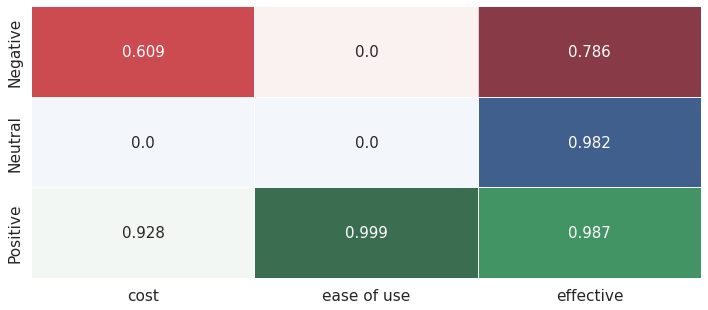

In [25]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Metric and Sanity Check

0.8831168831168831

['plants love this!']

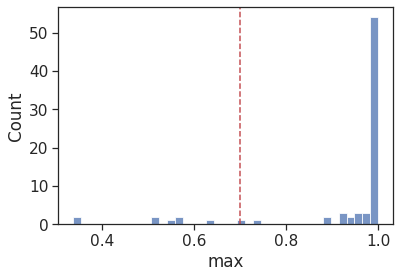

In [26]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
#for container in ax.containers:
#    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [27]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 17 to 68
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9 non-null      int64  
 1   segment               9 non-null      object 
 2   review_id             9 non-null      int64  
 3   product_name          9 non-null      object 
 4   producturl            9 non-null      object 
 5   retailer              9 non-null      object 
 6   brand                 9 non-null      object 
 7   retailer_product_id   9 non-null      object 
 8   base_id               9 non-null      object 
 9   variants_flag         9 non-null      object 
 10  review_creation_date  9 non-null      object 
 11  year                  9 non-null      int64  
 12  month                 9 non-null      int64  
 13  week                  9 non-null      int64  
 14  review_title          9 non-null      object 
 15  review_text           9 n

In [28]:
#df_uncat.to_csv('data/unlabeld_data.csv')